Epoch 1/10


c:\Users\cesar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 153ms/step - accuracy: 0.5189 - loss: 0.6927 - val_accuracy: 0.5407 - val_loss: 0.6865
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.5671 - loss: 0.6728 - val_accuracy: 0.7184 - val_loss: 0.5922
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.7793 - loss: 0.5034 - val_accuracy: 0.8573 - val_loss: 0.3575
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.8731 - loss: 0.3312 - val_accuracy: 0.8684 - val_loss: 0.3089
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.9133 - loss: 0.2333 - val_accuracy: 0.8655 - val_loss: 0.3143
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.9325 - loss: 0.1857 - val_accuracy: 0.8737 - val_loss: 0.3254
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.9513 - loss: 0.1436 - val_accuracy: 0.8741 - val_loss: 0.3848


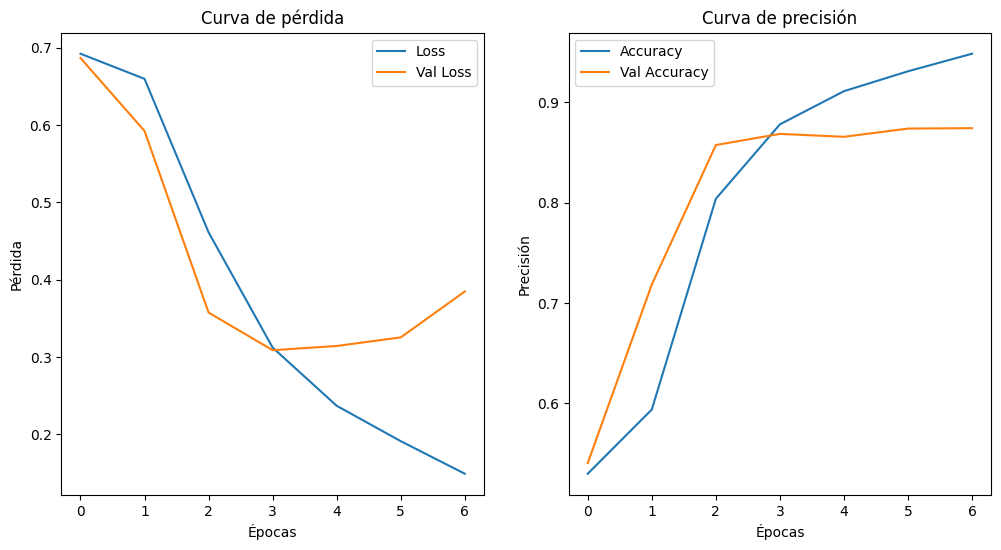

In [1]:
# train_model.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Cargar los datos preprocesados
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# 2. Definir el modelo LSTM
def create_lstm_model(vocab_size, embedding_dim=100, max_len=200):
    model = Sequential()
    # Capa de embedding para convertir palabras en vectores
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    # Capa LSTM
    model.add(LSTM(128, return_sequences=False))
    # Capa de Dropout para evitar el sobreajuste
    model.add(Dropout(0.5))
    # Capa de salida con activación sigmoide para clasificación binaria
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# 3. Crear y entrenar el modelo
vocab_size = 10000  # Este número debe ser igual al num_words definido en el script anterior
embedding_dim = 100
max_len = 200

model = create_lstm_model(vocab_size, embedding_dim, max_len)

# 4. Early stopping para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 5. Entrenar el modelo
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=64, 
                    callbacks=[early_stop])

# 6. Guardar el modelo entrenado
model.save('lstm_sentiment_model.h5')

# 7. Visualizar las métricas del entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    # Gráfico de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Curva de pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Curva de precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    
    plt.show()

# 8. Visualizar los resultados del entrenamiento
plot_training_history(history)

